In [1]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers

In [2]:
encoder = Sequential([layers.Dense(2, input_shape=[3])])
decoder = Sequential([layers.Dense(3, input_shape=[2])])

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer="sgd")

In [9]:
import numpy as np

def generate_3d_data(m ,w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi/2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m)/2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m)/2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w1 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [10]:
autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1122
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1115
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1108
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1100
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1093
Epoch 6/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1086
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1080
Epoch 8/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1074
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1067
Epoch 10/20
2/2 [==============================] - 0s 6ms/step - loss: 0.1060
Epoch 11/20
2/2 [==============================] - 0s 7ms/step - loss: 0.1054
Epoch 12/20
2/2 [==============================] - 0s 5ms/step - loss: 0.1047
Epoch 13/20
2/2 [==============================] - 0s 5ms/step - loss: 0.

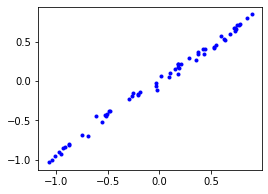

In [11]:
import matplotlib.pyplot as plt

coding = autoencoder.predict(X_train)
plt.figure(figsize=(4, 3))
plt.plot(coding[:, 0], coding[:, 1], "b.")